# Análisis de Egresos Hospitalarios

En este análisis se quiere ver la cantidad de egresos hospitalarios para diversos problemas
médicos, tanto cubiertos por GES y los no GES.

Las preguntas que se quieren responder con este análisis son:

- Cuántos casos del problema médico hubieron en cada año a nivel nacional?
- En qué región fué dónde hubo el mayor caso de estos problemas médicos?
- Cómo es la distribución etárea del problema médico?
- Cómo es la distribución por sexo del problema médico?
- Cómo es la distribución por tipo de previsión (FONASA e ISAPRE) del problema médico?
- Cómo es la distribución por sector público/privado del problema de salud?
- Cómo es la distribución por hospitales del problemad de salud?


Ahora, a nivel de Instituto Nacional del Tórax:

- Cuál es la cantidad de Egresos Hospitalarios del problema de salud en el Tórax? Cuánto es este 
porcentaje de la cantidad Nacional? Cómo se compara el porcentaje del Tórax con respecto a 
los otros Hospitales (Somos referencia?)
- Cuál es el grupo etáreo que mayoritariamente llega al Tórax?
- De cuántas procedencias llegan pacientes al Hospital del Tórax?


In [100]:
import importlib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import funciones_auxiliares as aux
import funciones_auxiliares_hito_2 as aux2

sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

importlib.reload(aux2)
importlib.reload(aux)

<module 'funciones_auxiliares' from 'c:\\Users\\finanzas\\Desktop\\Javier Rojas\\Javier\\trabajo\\SSMO\\EPH\\modulo_gestion\\1.analisis_problemas_de_salud\\egresos-hospitalarios\\funciones_auxiliares.py'>

In [2]:
dfs = aux.leer_anios_egresos()

c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:50: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:50: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:50: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', 

# Análisis de Variables Categóricas

En este apartado se quiere ver la distribución que tienen las variables categóricas de la base de
datos

Analizando todas las variables categoricas 

ID_PACIENTE
91F963B0790AA8D7FDBE02AB3B0CBFD7EA15BEC7    306
6BCD690647EA83E457F4AAFCD4047941A239176F    105
2057FF09EA8AFF1B92E5AAF19DEFC9FF80ACF289     99
8B0614F6FEFDDE092F7802BDF666E3D510A228D0     88
0BEDDE3D22D30D52077FDF9937CD714CC4B8640F     74
                                           ... 
6AC52E641A0FE51693A07E00FE39B3DCA6F677D9      1
3CEFDB73A7B1139E859288FFEBB3D4F9ECAC71BF      1
E56EE5AC18BC8E9136113570ECE30893A32D6C41      1
0A87C011FFF0307E0868B6F99A4135F2DF7C2245      1
602E989E30764335D157EA8409CB1F4122267DB6      1
Name: ID_PACIENTE, Length: 1250549, dtype: int64
--------------------------------------------------------------

GLOSA_ESTABLECIMIENTO_SALUD
Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)        46779
Clínica Dávila                                                          38799
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)    35206
Hospital Dr. Hernán Henríquez Aravena (T

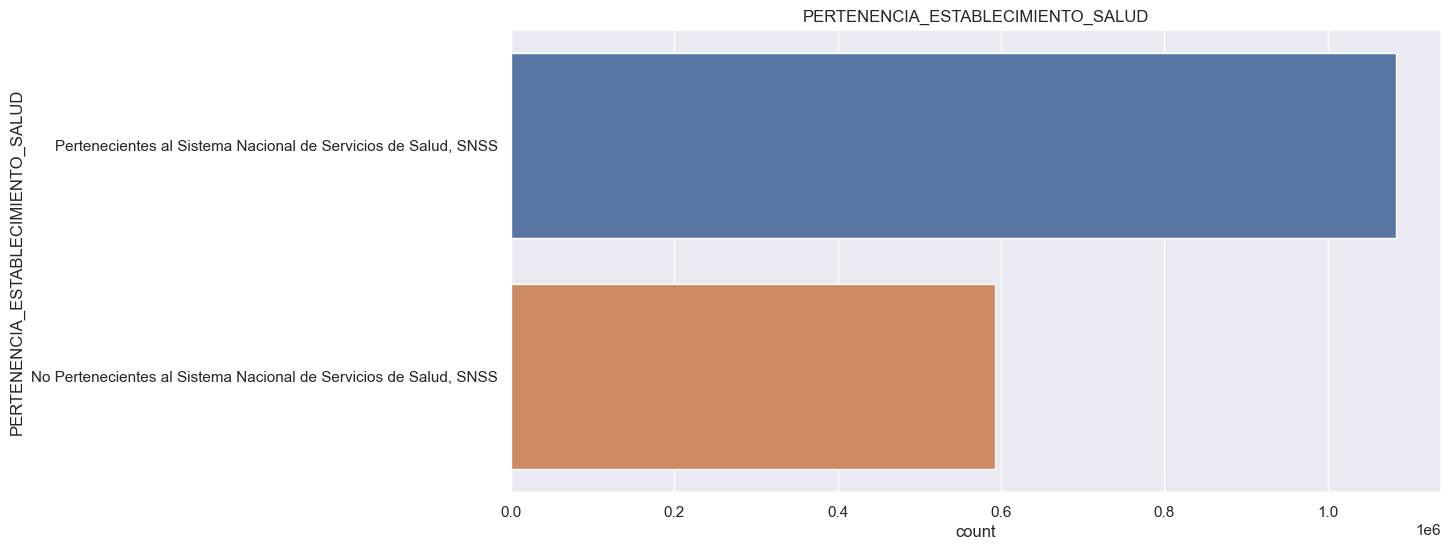

--------------------------------------------------------------

FECHA_NACIMIENTO
2009-05-30    337
2013-03-08    309
2013-01-30    301
2013-01-07    301
2013-01-09    299
             ... 
1915-04-20      1
1914-10-01      1
1918-01-05      1
1918-02-18      1
1917-03-23      1
Name: FECHA_NACIMIENTO, Length: 36364, dtype: int64
--------------------------------------------------------------

GLOSA_PAIS_ORIGEN
Chile                                1650058
Macao                                   5827
Perú                                    2247
Bolivia (Estado Plurinacional de)       1846
Argentina                                873
                                      ...   
Bahrein                                    1
Croacia                                    1
Moldova (República de)                     1
Santa Lucía                                1
Kiribati                                   1
Name: GLOSA_PAIS_ORIGEN, Length: 124, dtype: int64
-----------------------------------------

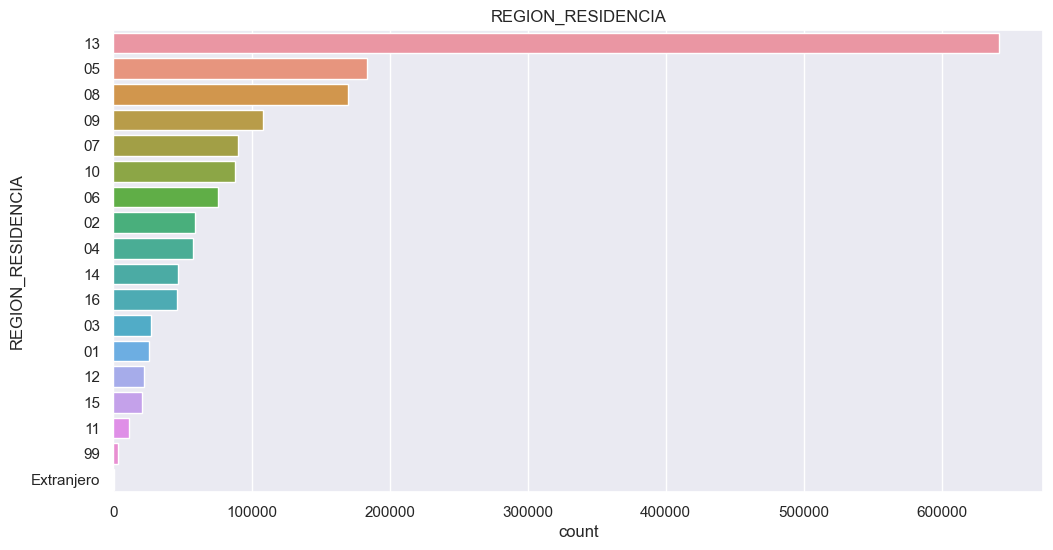

--------------------------------------------------------------

GLOSA_REGION_RESIDENCIA
Metropolitana de Santiago                  641495
De Valparaíso                              183477
Del Bíobío                                 170215
De La Araucanía                            108120
Del Maule                                   90242
De Los Lagos                                87897
Del Libertador B. O'Higgins                 75482
De Antofagasta                              59038
De Coquimbo                                 57418
De Los Ríos                                 46523
De Ñuble                                    45966
De Atacama                                  27287
De Tarapacá                                 25613
De Magallanes y de La Antártica Chilena     22066
De Arica y Parinacota                       20832
De Aisén del Gral. C. Ibáñez del Campo      11553
Ignorada                                     3410
Extranjero                                    302
Name: GLOSA_

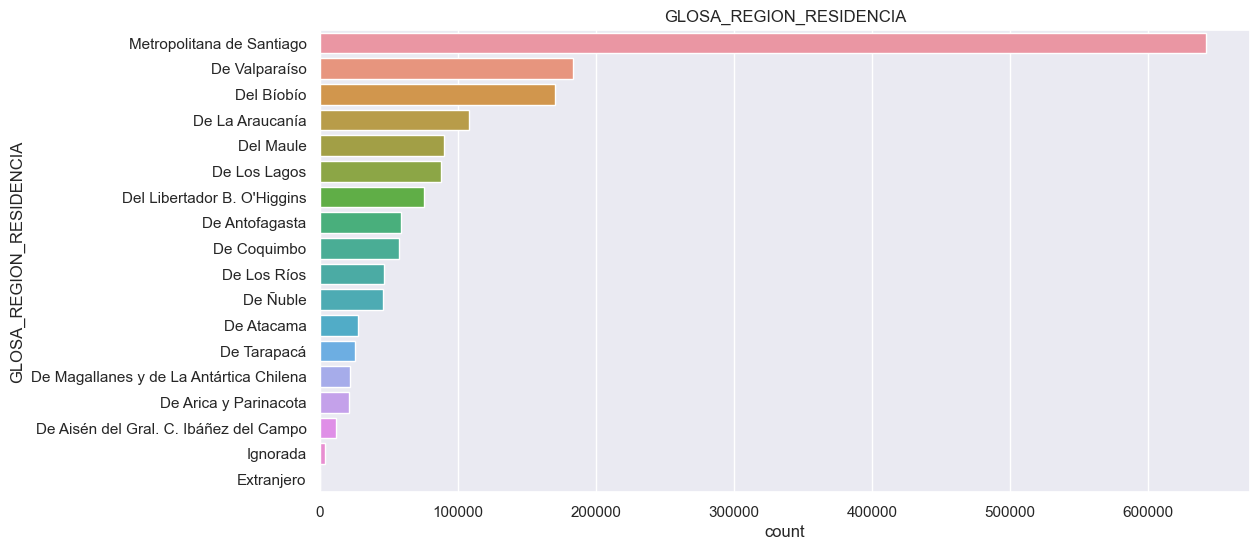

--------------------------------------------------------------

BENEFICIARIO
B    481694
A    353430
D    224790
C    148527
Name: BENEFICIARIO, dtype: int64


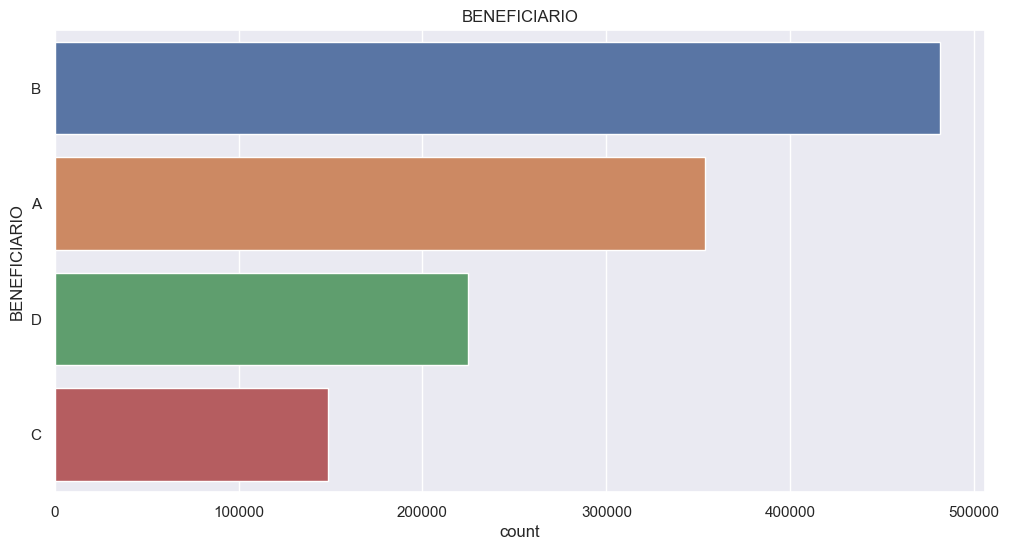

--------------------------------------------------------------

FECHA_EGRESO
2013-10-30    7185
2013-03-28    7125
2013-09-06    6805
2013-10-11    6798
2013-07-12    6765
              ... 
2013-09-21    1801
2013-11-03    1693
2013-09-22    1633
2013-12-25    1322
2013-01-01    1165
Name: FECHA_EGRESO, Length: 365, dtype: int64
--------------------------------------------------------------

DIAG1
O809    51852
O800    43017
O829    41582
J189    35760
O820    31252
        ...  
S452        1
E703        1
T404        1
T732        1
Z111        1
Name: DIAG1, Length: 7458, dtype: int64
--------------------------------------------------------------

GLOSA_DIAG1
PARTO UNICO ESPONTANEO, SIN OTRA ESPECIFICACION               51852
PARTO UNICO ESPONTANEO, PRESENTACION CEFALICA DE VERTICE      43017
PARTO POR CESAREA, SIN OTRA ESPECIFICACION                    41582
NEUMONIA, NO ESPECIFICADA                                     35760
PARTO POR CESAREA ELECTIVA                              

,cantidad_na,porcentaje_na
ID_PACIENTE,37026,2.21
ESTABLECIMIENTO_SALUD,0,0.00
GLOSA_ESTABLECIMIENTO_SALUD,0,0.00
PERTENENCIA_ESTABLECIMIENTO_SALUD,0,0.00
SEREMI,1084018,64.64
SERVICIO_DE_SALUD,592918,35.36
SEXO,0,0.00
FECHA_NACIMIENTO,156,0.01
EDAD_CANT,0,0.00
TIPO_EDAD,0,0.00


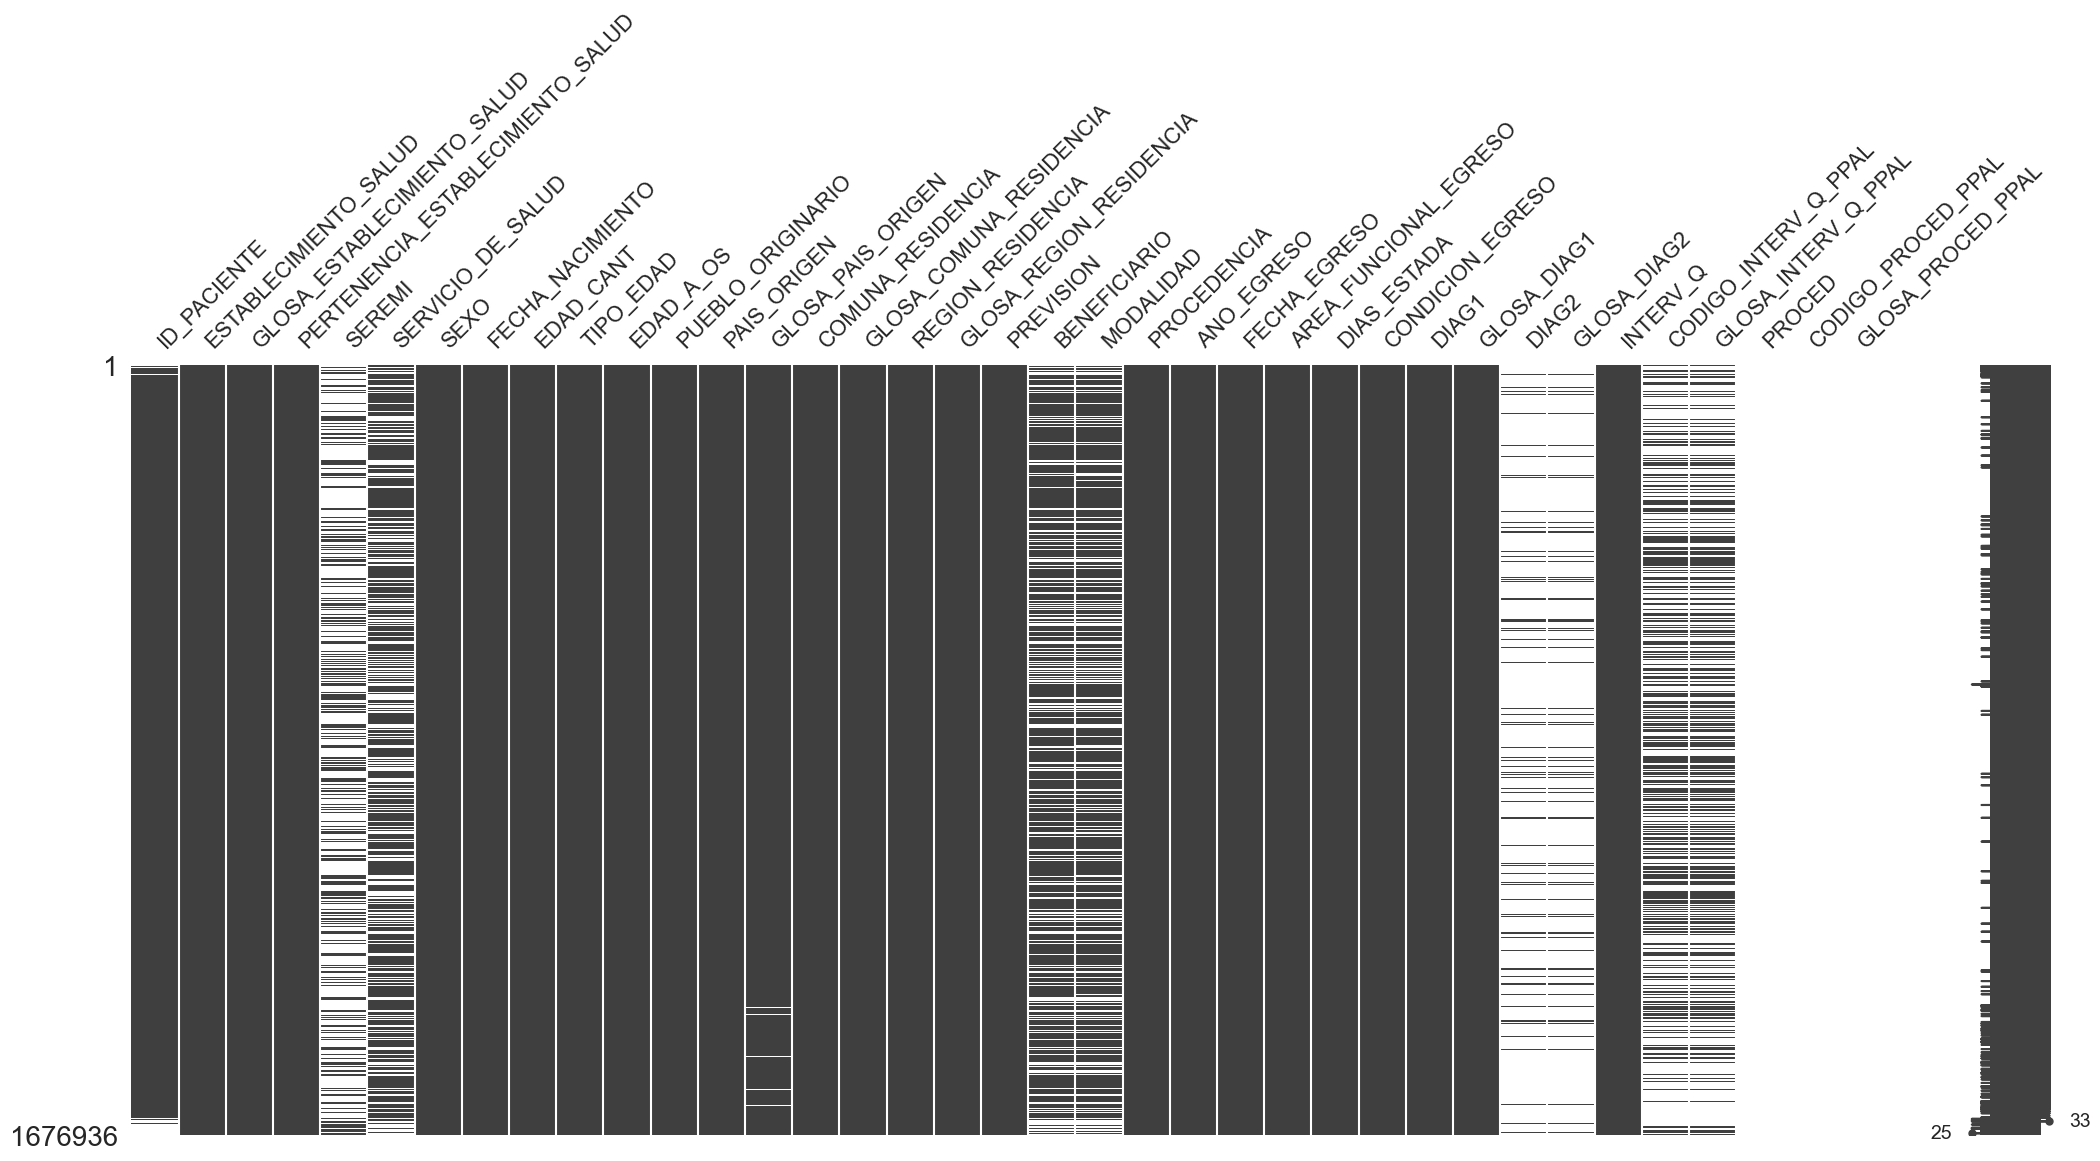

In [3]:
numericas, categoricas = aux2.separar_df_a_numericas_categoricas(dfs['2013'])
aux2.analizar_dist_todas_las_variables_categoricas(categoricas)
aux2.analizar_valores_faltantes(dfs['2013'])

# Analisis de Ranking del Torax

In [4]:
GLOSA_TORAX = 'Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica'

In [5]:
ranking = aux.analizar_ranking_diagnosticos_hospital(dfs['2013'], GLOSA_TORAX)

In [6]:
with pd.ExcelWriter('ranking_torax.xlsx') as writer:
    for anio, df_completa in dfs.items():
        ranking = aux.analizar_ranking_diagnosticos_hospital(df_completa, GLOSA_TORAX)
        ranking.to_excel(writer, sheet_name=anio, index=False)

# Análisis a lo largo del tiempo

In [69]:
def analizar_cantdad_egresos(egresos_en_el_tiempo):
    display(egresos_en_el_tiempo.to_frame())
    display(egresos_en_el_tiempo.describe().to_frame())
    aux.graficar_a_lo_largo_del_tiempo(egresos_en_el_tiempo.sort_index())
    aux2.graficar_distribucion_variable_numerica(egresos_en_el_tiempo.reset_index(drop=True), 
                                                'egresos')

In [64]:
df_completa = pd.concat(dfs.values())

KeyboardInterrupt: 

In [70]:
df_torax = df_completa.query('GLOSA_ESTABLECIMIENTO_SALUD == @GLOSA_TORAX')

,ANO_EGRESO
2013,1676936
2015,1671054
2018,1669602
2014,1660150
2016,1637265
2017,1637150
2019,1636508


,ANO_EGRESO
count,7.000000e+00
mean,1.655524e+06
std,1.803630e+04
min,1.636508e+06
25%,1.637208e+06
50%,1.660150e+06
75%,1.670328e+06
max,1.676936e+06


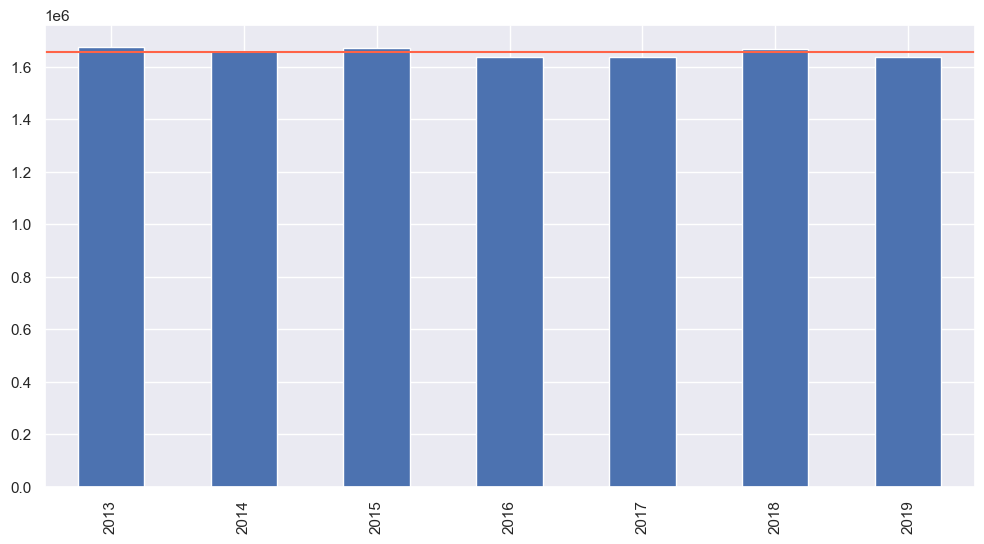

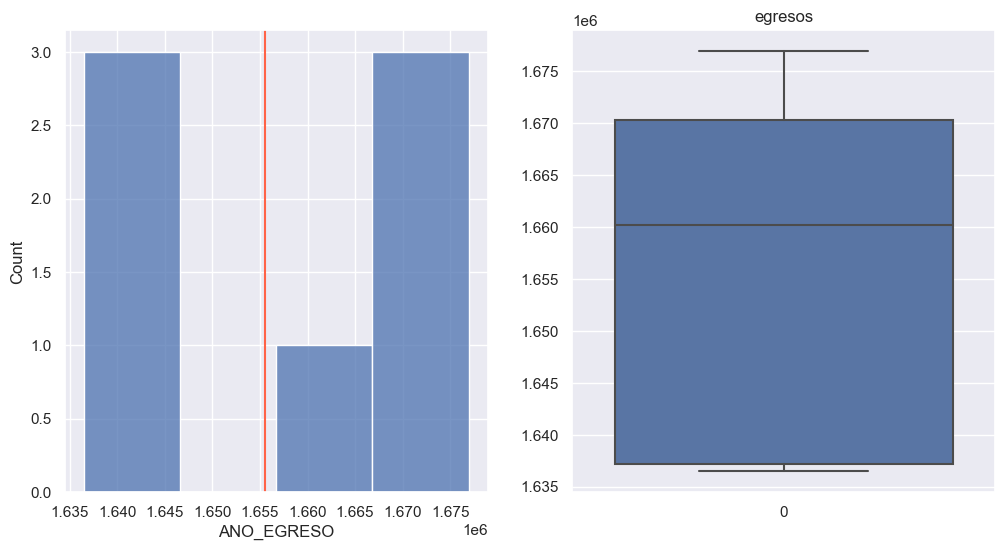

In [71]:
cantidad_egresos_totales = df_completa.ANO_EGRESO.value_counts()
analizar_cantdad_egresos(cantidad_egresos_totales)

**De estos resultados se puede ver que la cantidad de Egresos a lo largo del país se mantiene constante
entre 2013 a 2019.**

- 2013 fue el año con la mayor cantidad de egresos, con **1.676.936 egresos**
- 2019 fue el año con la menor cantidad de egresos, con **1.636.508 egresos**

- La media de egresos fueron **1.655.524 egresos**
- Hay **ausencia de valores atípicos** entre los años 2013 y 2019. Por lo tanto, en años normales (sin pandemia), es esperable que se mantenga esta tendencia y cantidad de egresos hospitalarios. 
- Hay **ausencia de una tendencia a la baja o a la subida** de egresos hospitalarios.

,ANO_EGRESO
2018,5482
2019,5435
2017,4901
2016,4872
2015,4621
2013,4435
2014,4409


,ANO_EGRESO
count,7.000000
mean,4879.285714
std,439.294402
min,4409.000000
25%,4528.000000
50%,4872.000000
75%,5168.000000
max,5482.000000


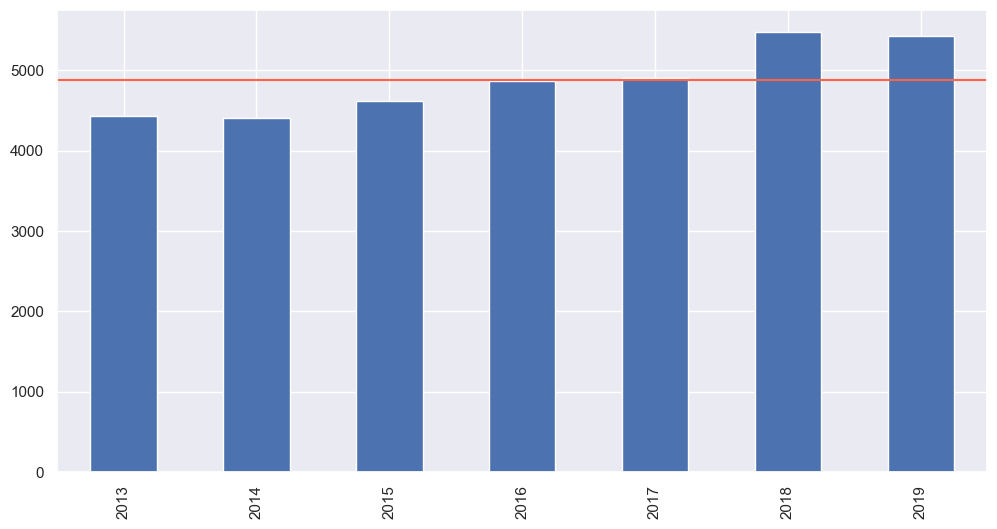

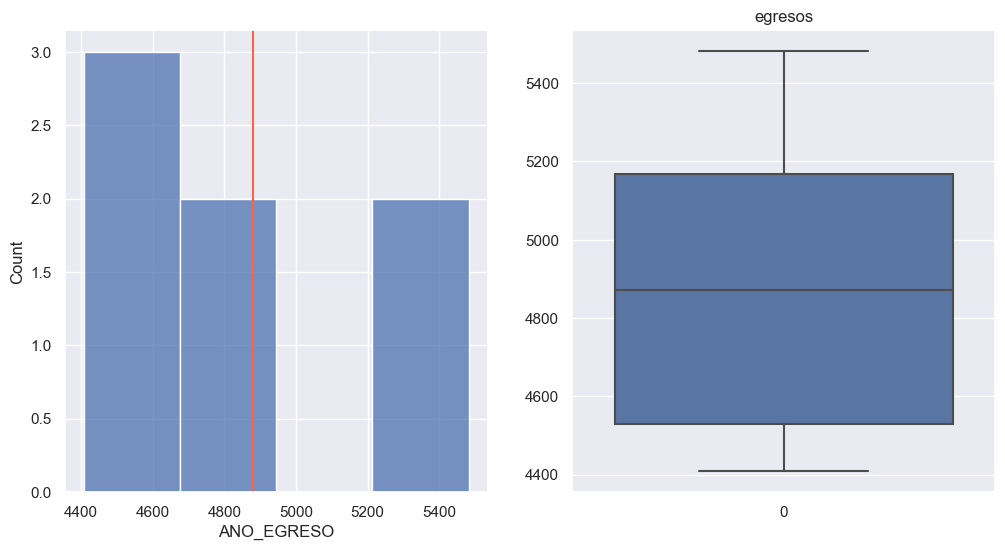

In [72]:
cantidad_egresos_torax = df_torax.ANO_EGRESO.value_counts()
analizar_cantdad_egresos(cantidad_egresos_torax)

**De estos resultados se puede ver que la cantidad de Egresos en el Tórax tiende al alza a lo largo
de los años**

- 2018 fue el año con la mayor cantidad de egresos, con **5482 egresos**
- 2014 fue el año con la menor cantidad de egresos, con **4409 egresos**

- La media de egresos fueron **4879**
- Hay **ausencia de valores atípicos** entre los años 2013 y 2019.

## Privado - Publico

CANTIDAD  \
ANO_EGRESO PERTENENCIA_ESTABLECIMIENTO_SALUD                              
2013       Pertenecientes al Sistema Nacional de Servicios...   1084018   
           No Pertenecientes al Sistema Nacional de Servic...    592918   
2014       Pertenecientes al Sistema Nacional de Servicios...   1073508   
           No Pertenecientes al Sistema Nacional de Servic...    586642   
2015       Pertenecientes al Sistema Nacional de Servicios...   1066715   
           No Pertenecientes al Sistema Nacional de Servic...    604339   
2016       Pertenecientes al Sistema Nacional de Servicios...   1031950   
           No Pertenecientes al Sistema Nacional de Servic...    605315   
2017       Pertenecientes al Sistema Nacional de Servicios...   1040368   
           No Pertenecientes al Sistema Nacional de Servic...    596782   
2018       Pertenecientes al Sistema Nacional de Servicios...   1060992   
           No Pertenecientes al Sistema Nacional de Servic...    608610   
2019       Pertenecientes al Sistema Nacional de Servicios...   1034114   
           No Pertenecientes al Sistema Nacional de Servic...    602394   

                                                               PORCENTAJE  
ANO_EGRESO PERTENENCIA_ESTABLECIMIENTO_SALUD                               
2013       Pertenecientes al Sistema Nacional de Servicios...    0.646428  
           No Pertenecientes al Sistema Nacional de Servic...    0.353572  
2014       Pertenecientes al Sistema Nacional de Servicios...    0.646633  
           No Pertenecientes al Sistema Nacional de Servic...    0.353367  
2015       Pertenecientes al Sistema Nacional de Servicios...    0.638349  
           No Pertenecientes al Sistema Nacional de Servic...    0.361651  
2016       Pertenecientes al Sistema Nacional de Servicios...    0.630289  
           No Pertenecientes al Sistema Nacional de Servic...    0.369711  
2017       Pertenecientes al Sistema Nacional de Servicios...    0.635475  
           No Pertenecientes al Sistema Nacional de Servic...    0.364525  
2018       Pertenecientes al Sistema Nacional de Servicios...    0.635476  
           No Pertenecientes al Sistema Nacional de Servic...    0.364524  
2019       Pertenecientes al Sistema Nacional de Servicios...    0.631903  
           No Pertenecientes al Sistema Nacional de Servic...    0.368097

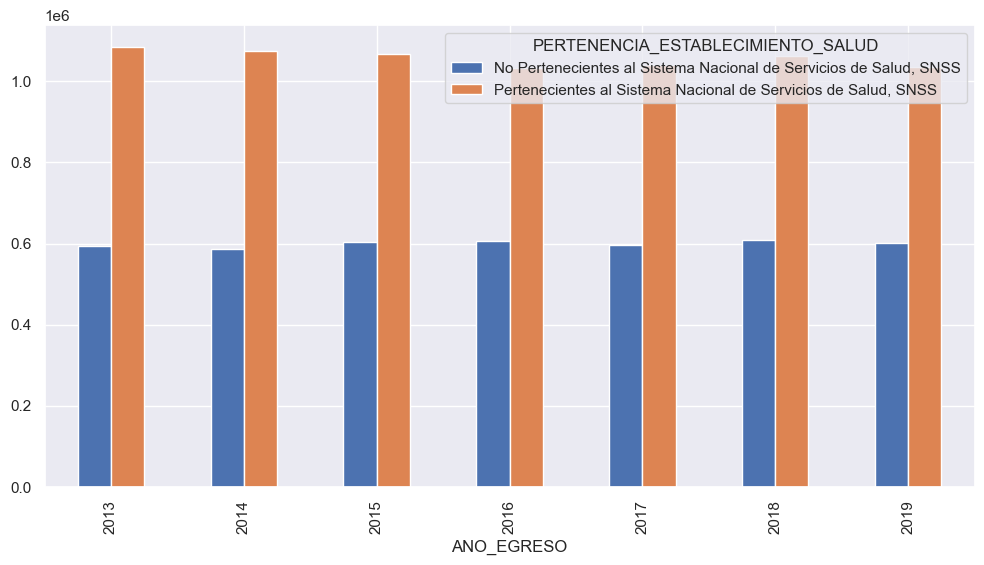

El resumen de Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS es:



,CANTIDAD,PORCENTAJE
count,7.000000e+00,7.000000
mean,1.055952e+06,0.637793
std,2.054675e+04,0.006516
min,1.031950e+06,0.630289
25%,1.037241e+06,0.633689
50%,1.060992e+06,0.635476
75%,1.070112e+06,0.642388
max,1.084018e+06,0.646633


El resumen de No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,599571.428571,0.362207
std,7795.299649,0.006516
min,586642.000000,0.353367
25%,594850.000000,0.357612
50%,602394.000000,0.364524
75%,604827.000000,0.366311
max,608610.000000,0.369711


In [101]:
juntas = aux.analisis_grafico_anidado_por_anio(df_completa, 'PERTENENCIA_ESTABLECIMIENTO_SALUD')

- A lo largo de los años, se puede ver una tendencia constante en la cantidad de casos de egresos
que van hacia el sector privado y público.

- El **sector público tuvo una media de egresos de 1.055.952** pacientes entre 2013 y 2019. El **porcentaje
promedio** de pacientes que van al sector público es del **63.8%**
- El **sector privado tuvo una media de egresos de 599.571** pacientes entre 2013 y 2019. El **porcentaje
promedio** de pacientes que van al sector público es del **36.2%**

# Análisis por Diagnóstico

Aquí se quiere ver la cantidad de diagnósticos que hizo el Tórax a lo largo de los años, y ver
cuántos corresponden a cardiaco, respiratorio, etc (Según las grandes causas)

In [75]:
def cambiar_cie_con_x(valor):
    if len(valor) == 3:
        return f'{valor}X'
    
    return valor

def obtener_diccionario_cie():
    cie = pd.read_excel('egresos/CIE-10.xlsx')
    cie['CodigoSinPunto'] = cie['Código'].str.replace('.', '', regex=False)
    cie['CodigoSinPunto'] = cie['CodigoSinPunto'].apply(cambiar_cie_con_x)

    return cie

In [22]:
cie = obtener_diccionario_cie()

In [23]:
torax_con_cie = pd.merge(df_torax, cie, how='left', left_on='DIAG1', right_on='CodigoSinPunto')

In [24]:
analisis_ranking = torax_con_cie.groupby(by=['ANO_EGRESO', 'Capítulo', 'Sección', 'Categoría'])[['DIAG1', 'GLOSA_DIAG1']].value_counts()
analisis_ranking = analisis_ranking.reset_index()

In [25]:
analisis_ranking.to_csv('prueba.csv', encoding='latin-1', sep=';')

# Analisis Procedimientos Quirurgicos

- Se quiere ver que diagnosticos con intervenciones quirurgicas son los mas frecuentes
- Se quiere ver cuantas intervenciones quirurgicas se han hecho a lo largo del tiempo en el Torax

## Cuantos procedimientos Quirúrgicos se han hecho a lo largo del tiempo?

CANTIDAD  PORCENTAJE
ANO_EGRESO INTERV_Q                      
2013       2             3272    0.737768
           1             1163    0.262232
2014       2             3307    0.750057
           1             1102    0.249943
2015       2             3426    0.741398
           1             1195    0.258602
2016       2             3576    0.733990
           1             1296    0.266010
2017       2             3564    0.727199
           1             1337    0.272801
2018       2             4082    0.744619
           1             1400    0.255381
2019       2             4147    0.763017
           1             1288    0.236983

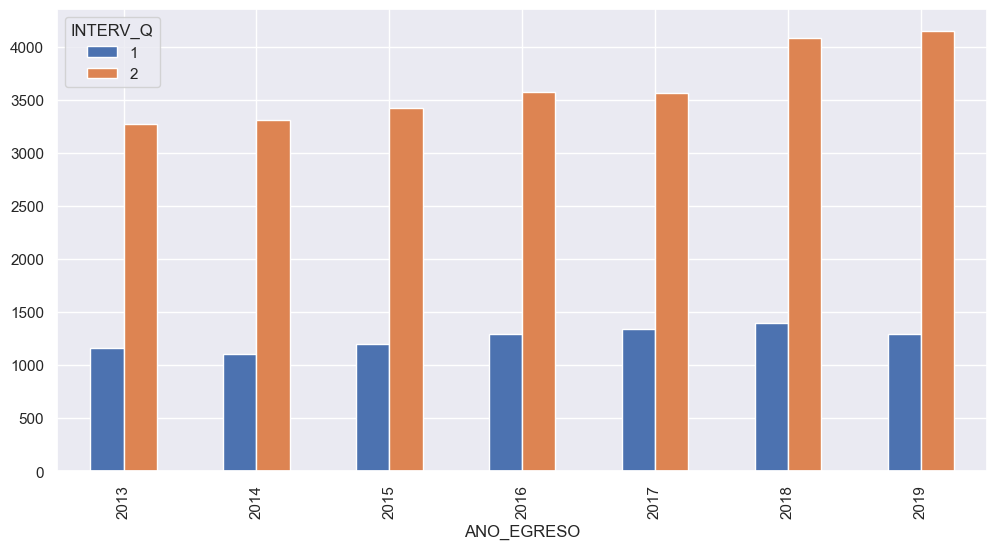

In [61]:
quir_torax = aux.analisis_grafico_anidado_por_anio(torax_con_cie, 'INTERV_Q')

Al observar los porcentajes de **Intervenciones Quirúrgicas y Sin Intervenciones Quirúrgicas del Hospital del Tórax**,
se puede ver que los valores se mantienen dentro de valores constantes:

- Las intervenciones quirúrgicas entre 2013 y 2019 corresponden al 25.7% de todos los egresos
del Hospital del Tórax
- Los egresos hospitalarios sin intervenciones quirúrgicas entre 2013 y 2019 corresponden al
74.3%.

Sin embargo, entre 2017 y 2019 se puede ver una baja del 2% en cada año en la cantidad de intervenciones
quirúrgicas. Por lo tanto, es importante discernir si esta baja se mantendrá en el tiempo, o corresponde
a una variación aleatoria.

CANTIDAD  PORCENTAJE
ANO_EGRESO INTERV_Q                      
2013       2           925863    0.552116
           1           751073    0.447884
2014       2           911577    0.549093
           1           748573    0.450907
2015       2           894283    0.535161
           1           776771    0.464839
2016       2           868618    0.530530
           1           768647    0.469470
2017       2           846157    0.516848
           1           790993    0.483152
2018       2           918125    0.549907
           1           751477    0.450093
2019       2           912114    0.557354
           1           724394    0.442646

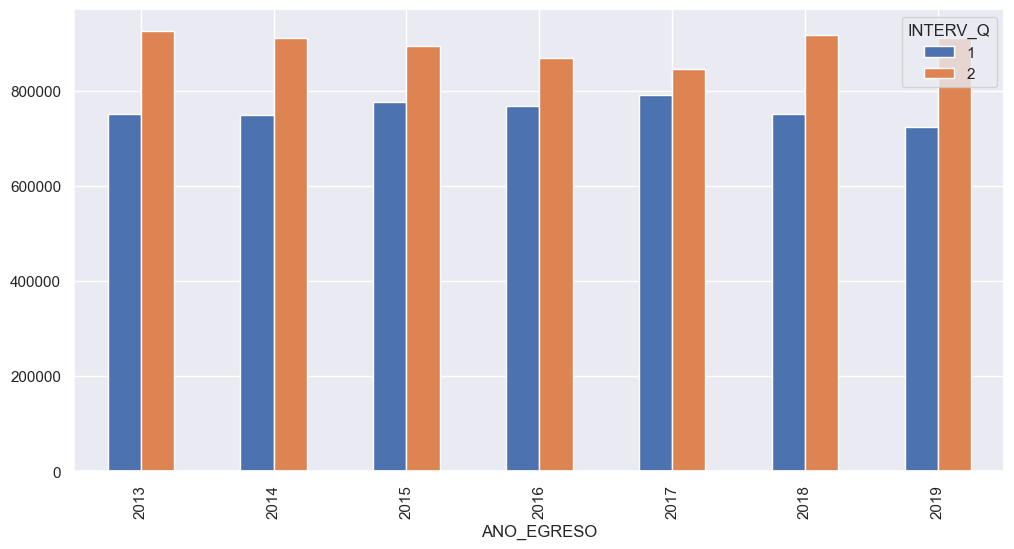

In [76]:
inter_q_pais = aux.analisis_grafico_anidado_por_anio(df_completa, 'INTERV_Q')

Al ver la situacion pais, se puede ver que la cantidad de Intervenciones Quirurgicas y No Quirurgicas
tienden a valores mas cercanos entre si:

- Las Intervenciones No Quirurgicas tienen en promedio 896677 casos entre 2013 y 2019. Esto corresponde
al 54.2% de todos los egresos hospitalarios en ese periodo
- Las Intervenciones Quirurgicas tienen en promedio 758847 casos entre 2013 y 2019. Esto corresponde
al 45.8% de todos los egresos hospitalarios en ese periodo
- Entre 2017 y 2019 se puede observar una baja en la cantidad de egresos con Intervenciones Quirurgicas

El resumen de 2 es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,896676.714286,0.541573
std,29204.621168,0.014495
min,846157.000000,0.516848
25%,881450.500000,0.532845
50%,911577.000000,0.549093
75%,915119.500000,0.551011
max,925863.000000,0.557354


El resumen de 1 es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,758846.857143,0.458427
std,21825.029030,0.014495
min,724394.000000,0.442646
25%,749823.000000,0.448989
50%,751477.000000,0.450907
75%,772709.000000,0.467155
max,790993.000000,0.483152


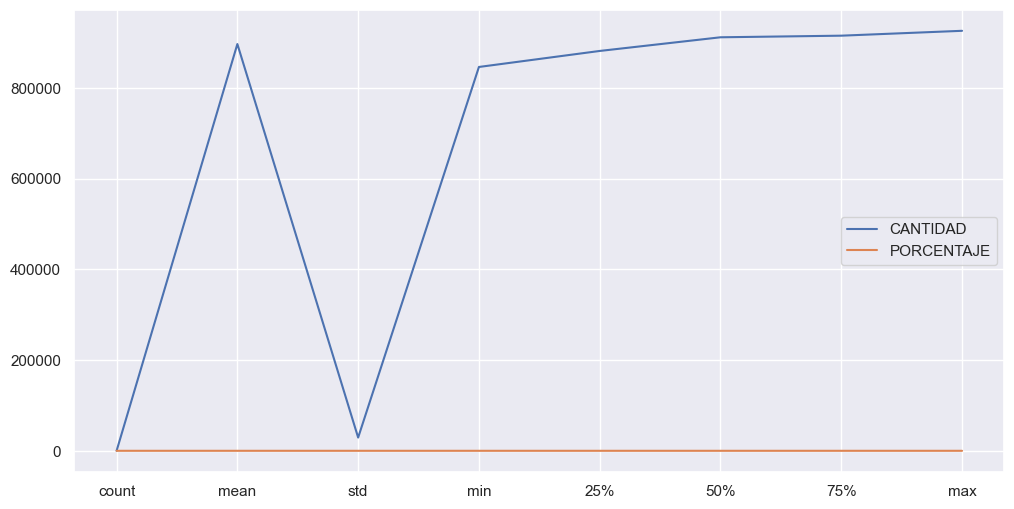

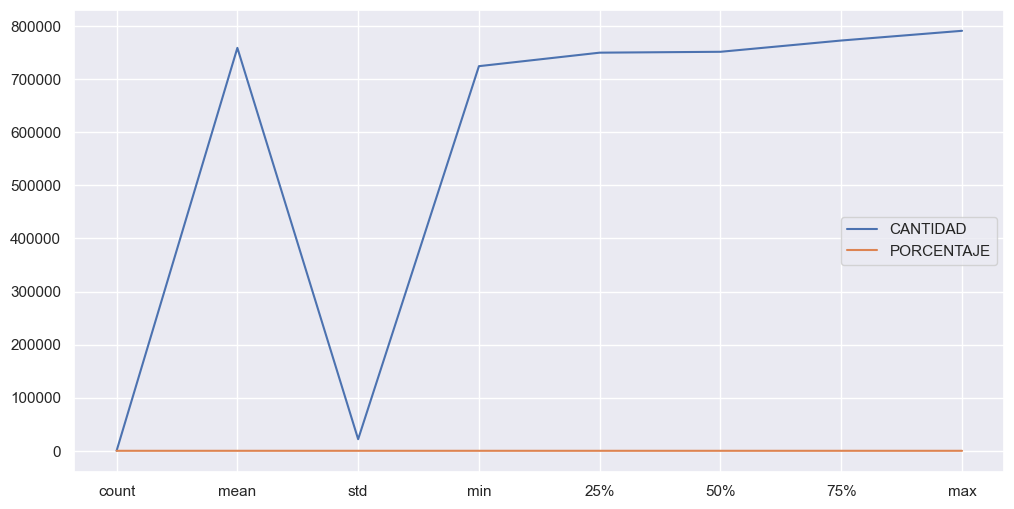

In [99]:
obtener_resumen_por_nivel(inter_q_pais, 'INTERV_Q')